# Homework 1 - Basic practice in Jupyter and GitHub.

Programming can only be learned by doing. The following exercises blend coding math and text to create clearly defined results. For example, instead of calculating a simple number, you must print the number plus the units (e.g. 24 mg/L). 

***
### Academic honesty statement

**SANTIAGO ORTIZ LAVERDE**

- I state that I worked alone on this assignment. Therefore, I take full responsibility for the academic integrity of the work presented below.
***

***
# Problem 1: Gas Laws

The virial equation for a gas can be represented as $\frac{PV}{RT} = 1 + \frac{B}{V} + \frac{C}{V^2}$ where $V$ is the molar volume.

For isopropanol $B=-388 cm^3/mol$ and $C=-26,000 cm^6/mol^2$.

We are going to find $V$ for isopropanol at 200 ∘C and 10 bar with a graphical technique.

In this problem $R=83.14 cm^3 bar / (mol K)$.

## 1.1 Compute V for an ideal gas

The ideal gas law is $1 = \frac{PV}{RT}$. Use this to estimate the volume of isopropanol in the ideal gas state. Print your answer with one decimal place and the printed answer **must include units.**

In [1]:
T = 200 + 273.15  # Temperature, [K]
P = 10            # Pressure, [bar]
R = 83.14         # Gas constant, [cm^3.bar]/[mol.K]
V_ideal = R*T/P   # Molar volume (ideal gas), [cm^3/mol]
V = round(V_ideal, digits=1)
printstyled("Molar volume computed from ideal gas equation: $(V) cm^3/mol \n";  color=:blue)

Molar volume computed from ideal gas equation: 3933.8 cm^3/mol 


## 1.2 Compute V for the Virial Gas Law

### 1.2.1 To do this, create a new function:

$f(V) = \frac{PV}{RT} - 1 - \frac{B}{V} - \frac{C}{V^2} = 0$

and then find values of $V$ where $f(V) = 0$. Start by defining this function and test that it works. Show that your function works by evaluating it for some examples, including an array of volumes.


In [2]:
B = -388    # Constant in Virial Gas equation, [cm^3/mol]
C = -26000  # Constant in Virial Gas equation, [cm^6/mol^2]

function virial(V, P, T)
  f_V = P*V/(R*T) - 1 - B/V - C/V^2
  return f_V
end

f = round(virial(V_ideal, P, T), digits=5)
printstyled("Evaluating the function 'virial' for the volume computed by ideal gas:\n f(V)=$(f) \n\n";
            color=:blue)
f = round.(virial.(range(1000, 6000, 10), P, T), digits=5)
printstyled("Evaluating the function 'virial' for an array of volume values:\n f(V)=$(f) \n";
            color=:blue)

Evaluating the function 'virial' for the volume computed by ideal gas:
 f(V)=0.10031 

Evaluating the function 'virial' for an array of volume values:
 f(V)=[-0.33179, -0.34439, -0.27371, -0.17295, -0.05796, 0.06487, 0.1925, 0.32325, 0.45617, 0.59064] 


### 1.2.2 Plot f(V) over a range where you can observe a zero

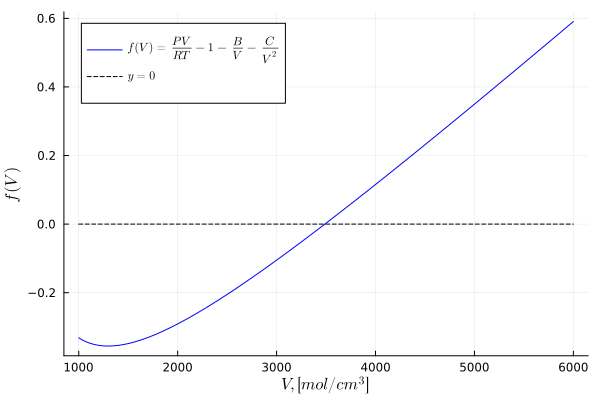

In [3]:
using Plots
using LaTeXStrings

v = range(1000, 6000, 100)
F = virial.(v, P, T)
virl = plot(v, F, xlabel=L"V, [mol/cm^3]", ylabel=L"f(V)", ls=:solid, c=:blue,
            label=L"f(V) = \frac{PV}{RT} - 1 - \frac{B}{V} - \frac{C}{V^2}")
plot!(virl, [findmin(v)[1], findmax(v)[1]], [0, 0], ls=:dash, c=:black, label=L"y=0", legend=:topleft)

You should make the x-axis sufficiently zoomed in to estimate the solution to about 10 cm<sup>3</sup>. State in words where the solution(s) are.

The molar volume computed from virial gas equation is in the range: 3487.7 - 3487.75 cm^3/mol, according to the picture below.


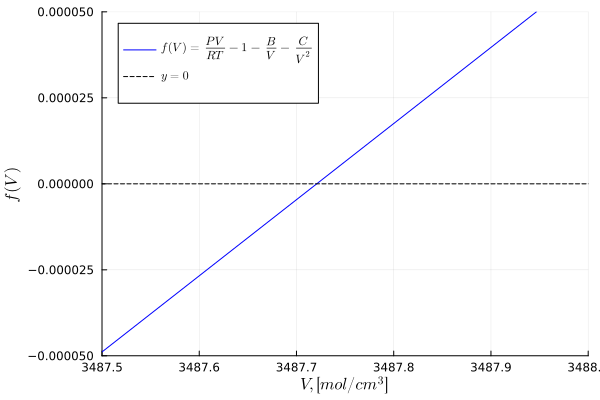

In [4]:
printstyled("The molar volume computed from virial gas equation is in the range: 3487.7 - 3487.75 cm^3/mol, according to the picture below.\n"; 
            color=:blue)

zoomvirl = plot(v, F, ls=:solid, c=:blue, label=L"f(V) = \frac{PV}{RT} - 1 - \frac{B}{V} - \frac{C}{V^2}")
plot!(zoomvirl, [findmin(v)[1], findmax(v)[1]], [0, 0], ls=:dash, c=:black, label=L"y=0")
plot!(zoomvirl, xlabel=L"V, [mol/cm^3]", ylabel=L"f(V)",
      xlims=(3487.5, 3488), ylims=(-0.00005, 0.00005), legend=:topleft)

### 1.2.3 Express this in the form of a cubic polynomial in $V$

Derive an alternative expression for f(V) where it is a cubic polynomial of the form $0 = a V^3 + b V^2 + c V + d$. Write this expression in LaTeX, with explicit definitions for the coefficients.

The coefficients of the cubic polynomial fitting are:
a = -0.3178468 cm^9/mol^3 
b = -0.0001226 cm^6/mol^2 
c = 1.0e-7 cm^3/mol 
d = -0.0 


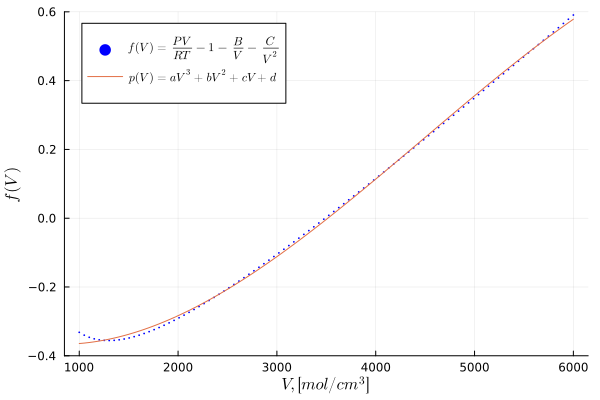

In [5]:
using Polynomials

xv = range(1000, 6000, 100)
p3 = fit(xv, F, 3) # degree = 3
pc = round.(coeffs(p3), digits=7)

a=pc[1]; b=pc[2]; c=pc[3]; d=pc[4]
printstyled("The coefficients of the cubic polynomial fitting are:\n";  color=:blue)
printstyled("a = $(a) cm^9/mol^3 \n";  color=:yellow)
printstyled("b = $(b) cm^6/mol^2 \n";  color=:yellow)
printstyled("c = $(c) cm^3/mol \n";  color=:yellow)
printstyled("d = $(d) \n";  color=:yellow)

scatrvirl = scatter(xv, F, markerstrokewidth=0, markersize=1, markercolor=:blue,
                    label=L"f(V) = \frac{PV}{RT} - 1 - \frac{B}{V} - \frac{C}{V^2}")
plot!(scatrvirl, xv, p3.(xv), label=L"p(V) = a V^3 + b V^2 + c V + d")
plot!(scatrvirl, xlabel=L"V, [mol/cm^3]", ylabel=L"f(V)", ylims=(-0.4, 0.6), legend=:topleft)

***